In [1]:
import networkx as nx
import numpy as np
from collections import defaultdict
from copy import copy
from copy import deepcopy
from dataclasses import dataclass
from itertools import repeat
from matplotlib import pyplot as plt
from operator import itemgetter
from scipy.optimize import linprog
from statistics import median
from typing import Any
from typing import Callable
from typing import ClassVar
from typing import Dict
from typing import List
from typing import NoReturn
from typing import Optional
from typing import Set
from typing import Tuple

In [2]:
dag9nodes = """<?xml version="1.0" encoding="UTF-8"?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns"  
  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns
  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph id="flow" edgedefault="directed">
    <node id="n0"/>
    <node id="n1"/>
    <node id="n2"/>
    <node id="n3"/>
    <node id="n4"/>
    <node id="n5"/>
    <node id="n6"/>
    <node id="n7"/>
    <node id="n8"/>
    <edge source="n0" target="n1"/>
    <edge source="n1" target="n2"/>
    <edge source="n1" target="n4"/>
    <edge source="n2" target="n5"/>
    <edge source="n3" target="n4"/>
    <edge source="n4" target="n7"/>
    <edge source="n5" target="n6"/>
    <edge source="n5" target="n7"/>
    <edge source="n7" target="n8"/>
  </graph>
</graphml>"""

path = 'dag9nodes.xml'

with open(path, 'w') as f:
    f.write(dag9nodes)

In [3]:
dag13nodes = """<?xml version="1.0" encoding="UTF-8"?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns"
  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns
  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph id="tree" edgedefault="directed">
    <node id="n1"/>
    <node id="n2"/>
    <node id="n3"/>
    <node id="n4"/>
    <node id="n5"/>
    <node id="n6"/>
    <node id="n7"/>
    <node id="n8"/>
    <node id="n9"/>
    <node id="n10"/>
    <node id="n11"/>
    <node id="n12"/>
    <node id="n13"/>
    <edge source="n1" target="n3"/>
    <edge source="n1" target="n4"/>
    <edge source="n3" target="n5"/>
    <edge source="n3" target="n6"/>
    <edge source="n3" target="n8"/>
    <edge source="n3" target="n9"/>
    <edge source="n4" target="n7"/>
    <edge source="n4" target="n8"/>
    <edge source="n4" target="n10"/>
    <edge source="n5" target="n11"/>
    <edge source="n7" target="n9"/>
    <edge source="n8" target="n10"/>
    <edge source="n9" target="n12"/>
    <edge source="n10" target="n11"/>
    <edge source="n10" target="n12"/>
    <edge source="n11" target="n13"/>
    <edge source="n12" target="n13"/>
  </graph>
</graphml>"""

path = 'dag13nodes.xml'

with open(path, 'w') as f:
    f.write(dag13nodes)

In [4]:
dag44nodes = """<?xml version="1.0" encoding="UTF-8"?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns"  
  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns
  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph id="flow" edgedefault="directed">
    <node id="n0"/>
    <node id="n1"/>
    <node id="n2"/>
    <node id="n3"/>
    <node id="n4"/>
    <node id="n5"/>
    <node id="n6"/>
    <node id="n7"/>
    <node id="n8"/>
    <node id="n9"/>
    <node id="n10"/>
    <node id="n11"/>
    <node id="n12"/>
    <node id="n13"/>
    <node id="n14"/>
    <node id="n15"/>
    <node id="n16"/>
    <node id="n17"/>
    <node id="n18"/>
    <node id="n19"/>
    <node id="n20"/>
    <node id="n21"/>
    <node id="n22"/>
    <node id="n23"/>
    <node id="n24"/>
    <node id="n25"/>
    <node id="n26"/>
    <node id="n27"/>
    <node id="n28"/>
    <node id="n29"/>
    <node id="n30"/>
    <node id="n31"/>
    <node id="n32"/>
    <node id="n33"/>
    <node id="n34"/>
    <node id="n35"/>
    <node id="n36"/>
    <node id="n37"/>
    <node id="n38"/>
    <node id="n39"/>
    <node id="n40"/>
    <node id="n41"/>
    <node id="n42"/>
    <node id="n43"/>
    <edge source="n0" target="n6"/>
    <edge source="n1" target="n31"/>
    <edge source="n2" target="n7"/>
    <edge source="n2" target="n17"/>
    <edge source="n2" target="n22"/>
    <edge source="n3" target="n14"/>
    <edge source="n4" target="n12"/>
    <edge source="n5" target="n6"/>
    <edge source="n5" target="n10"/>
    <edge source="n6" target="n8"/>
    <edge source="n6" target="n14"/>
    <edge source="n7" target="n16"/>
    <edge source="n7" target="n19"/>
    <edge source="n8" target="n16"/>
    <edge source="n8" target="n22"/>
    <edge source="n9" target="n11"/>
    <edge source="n10" target="n11"/>
    <edge source="n10" target="n16"/>
    <edge source="n11" target="n12"/>
    <edge source="n12" target="n14"/>
    <edge source="n12" target="n17"/>
    <edge source="n13" target="n19"/>
    <edge source="n14" target="n20"/>
    <edge source="n14" target="n25"/>
    <edge source="n15" target="n21"/>
    <edge source="n15" target="n31"/>
    <edge source="n16" target="n18"/>
    <edge source="n16" target="n28"/>
    <edge source="n17" target="n18"/>
    <edge source="n17" target="n19"/>
    <edge source="n17" target="n28"/>
    <edge source="n18" target="n26"/>
    <edge source="n19" target="n23"/>
    <edge source="n20" target="n23"/>
    <edge source="n21" target="n27"/>
    <edge source="n22" target="n25"/>
    <edge source="n23" target="n24"/>
    <edge source="n23" target="n26"/>
    <edge source="n24" target="n30"/>
    <edge source="n25" target="n33"/>
    <edge source="n25" target="n40"/>
    <edge source="n26" target="n27"/>
    <edge source="n26" target="n31"/>
    <edge source="n27" target="n29"/>
    <edge source="n27" target="n40"/>
    <edge source="n28" target="n33"/>
    <edge source="n29" target="n30"/>
    <edge source="n29" target="n32"/>
    <edge source="n30" target="n33"/>
    <edge source="n31" target="n33"/>
    <edge source="n32" target="n34"/>
    <edge source="n33" target="n35"/>
    <edge source="n33" target="n36"/>
    <edge source="n33" target="n41"/>
    <edge source="n34" target="n36"/>
    <edge source="n36" target="n37"/>
    <edge source="n37" target="n38"/>
    <edge source="n37" target="n42"/>
    <edge source="n38" target="n39"/>
    <edge source="n39" target="n43"/>
    <edge source="n40" target="n42"/>
    <edge source="n41" target="n42"/>
  </graph>
</graphml>"""

path = 'dag44nodes.xml'

with open(path, 'w') as f:
    f.write(dag44nodes)

In [5]:
@dataclass
class Coord:
    x:          int           = 0
    y:          int           = 0
    COORD_ATTR: ClassVar[str] = "coord"
        
    def copy(self, x: int = None, y: int = None):
        return Coord(x = x or self.x, y = y or self.y)

## Базовый класс для отрисовки DAG'a

In [6]:
class AcyclicGraphDrawer:
    inf = float("inf")
    
    def __init__(self, path: str, layer_wide: Optional[int] = None):
        self.layer_wide:    Optional[int]              = layer_wide
        self.graph:         nx.classes.digraph.DiGraph = nx.read_graphml(path)
        self.nodes:         List[str]                  = list(self.graph.nodes)
        self.id_by_node:    Dict[str, int]             = {node: node_id 
                                                          for node_id, node in enumerate(self.nodes)}
        self.node_by_id:    Dict[int, str]             = dict(zip(self.id_by_node.values(), self.id_by_node.keys()))
        self.nodes_num:     int                        = len(self.nodes)
        self.edges:         List[Tuple[str, str]]      = self.graph.edges.keys()
        self.layer_by_node: Dict[str, int]             = {}
        self.pic_path:      str                        = path.replace("xml", "png")
            
    @property
    def layers(self) -> Dict[int, List[str]]:
        layers: Dict[int, List[str]] = defaultdict(list)
        for vertex in self.nodes:
            layers[self.layer_by_node[vertex]].append(vertex)  
        return layers
    
    @property
    def pos(self) -> Dict[str, Tuple[int, int]]:
        pos: Dict[str, Tuple[int, int]] = {}
        for y, layer in self.layers.items():
            for x, vertex in enumerate(layer):
                pos[vertex] = (x, y)
        return pos
            
    def draw(self, pos: Dict[str, Tuple[int, int]]) -> NoReturn:
        fig, ax = plt.subplots(figsize=(12, 15))
        ax.grid(True)
        nx.draw(G=self.graph, 
                pos=pos, 
                nodelist=list(filter(lambda node: node.startswith('n'), self.graph)),
                with_labels=True, 
                node_size=600, 
                node_color='yellow', 
                ax=ax)    
        nx.draw(G=self.graph, 
                pos=pos, 
                nodelist=list(filter(lambda node: node.startswith('d'), self.graph)),
                with_labels=True, 
                node_size=800, 
                node_color='red', 
                ax=ax)
        nx.draw_networkx_labels(self.graph, pos)
        nx.draw_networkx_edges(self.graph, pos)
        plt.savefig(self.pic_path)

## Класс для отрисовки DAG'a методом Грэхема—Коффмана (без dummy-вершин)

In [7]:
class NaiveGrahamCoffmanDrawer(AcyclicGraphDrawer):
    def __init__(self, path: str, layer_wide: Optional[int] = None):
        super().__init__(path, layer_wide)
        self.pi: Dict[str, float] = dict(zip(self.nodes, repeat(self.inf)))

    def get_ancestors(self, vertex) -> List[str]:
        return list(map(
            itemgetter(0), 
            filter(lambda edge: edge[1] == vertex, self.edges)
        ))
    
    def graham_coffman(self) -> NoReturn:
        unused:  Set[str]  = set(self.nodes)
        topsort: List[str] = []

        for order in range(self.nodes_num):            
            min_ancestors: List[int]     = [self.inf]
            min_vertex:    Optional[int] = None

            for vertex in unused:
                if self.pi[vertex] == self.inf:
                    ancestors = sorted(
                        [self.pi[ancestor] for ancestor in self.get_ancestors(vertex)], 
                        reverse=True
                    )
                    if ancestors < min_ancestors:
                        min_ancestors = ancestors
                        min_vertex = vertex

            self.pi[min_vertex] = order
            topsort.append(min_vertex)
            unused.remove(min_vertex)

        current_layer: int                  = 0
        layers:        Dict[int, List[str]] = defaultdict(list)
        
        for v in reversed(topsort):
            if len(layers[current_layer]) == self.layer_wide:
                current_layer += 1                
            if any(map(lambda x: x in layers[current_layer], self.graph[v])):
                current_layer += 1
            layers[current_layer].append(v)
            self.layer_by_node[v] = current_layer

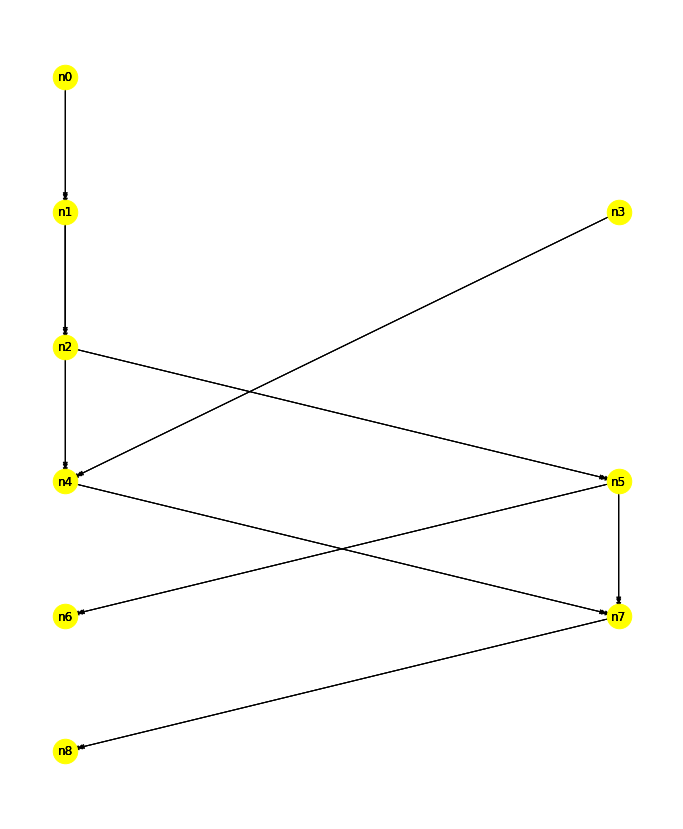

In [8]:
drawer = NaiveGrahamCoffmanDrawer('dag9nodes.xml', 4)
drawer.graham_coffman()
drawer.draw(drawer.pos)

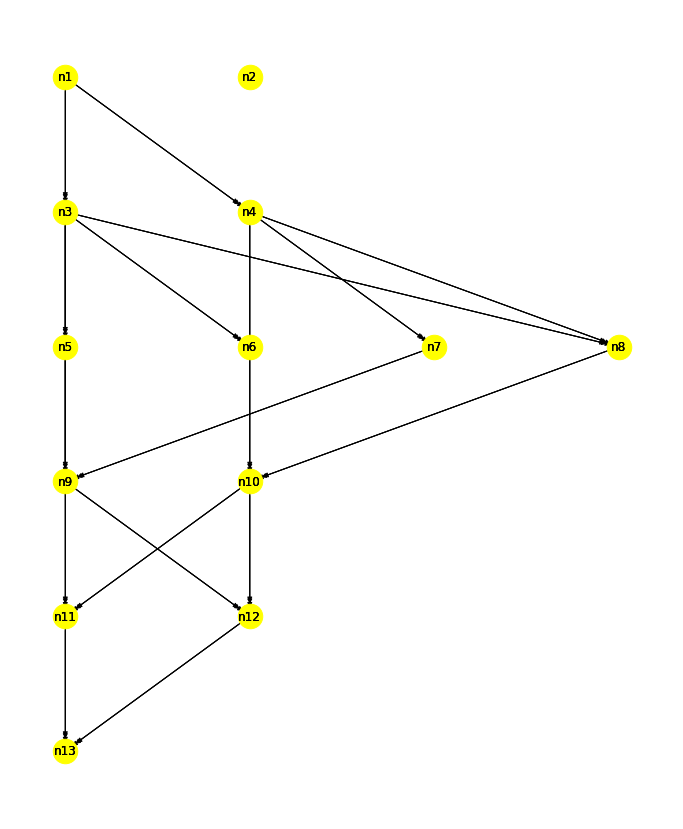

In [9]:
drawer = NaiveGrahamCoffmanDrawer('dag13nodes.xml', 5)
drawer.graham_coffman()
drawer.draw(drawer.pos)

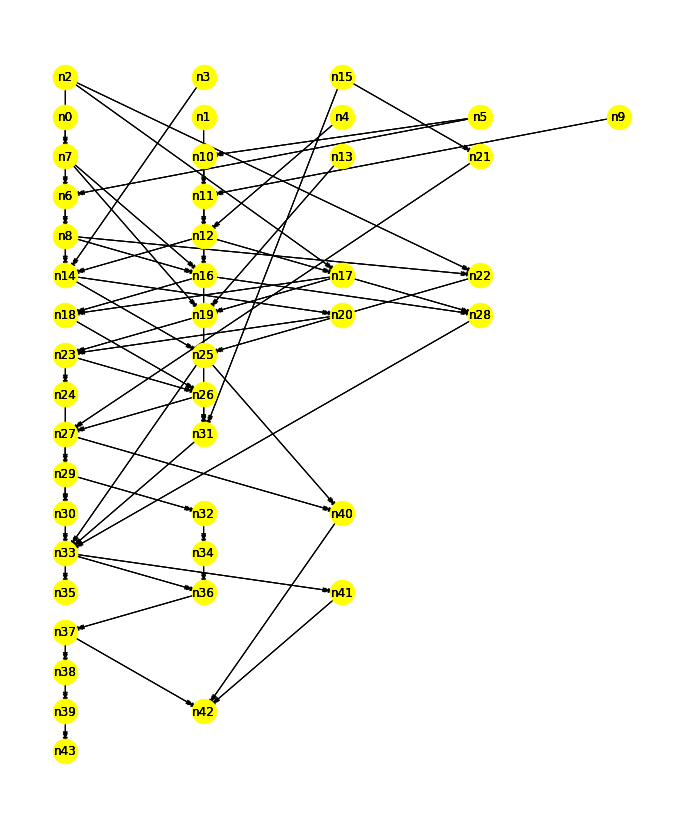

In [10]:
drawer = NaiveGrahamCoffmanDrawer('dag44nodes.xml', 5)
drawer.graham_coffman()
drawer.draw(drawer.pos)

## Класс для отрисовки DAG'a методом линейного программирования (без dummy-вершин)

In [11]:
class NaiveUnlimWideDrawer(AcyclicGraphDrawer):
    def __init__(self, path: str, layer_wide: Optional[int] = None):
        super().__init__(path, layer_wide)
        
    def solver(self) -> Dict[str, Any]:
        c:    List[int]       = [0 for _ in range(self.nodes_num)]
        A_ub: List[List[int]] = []
        
        for from_node, to_node in self.edges:
            row: List[int] = [0 for _ in range(self.nodes_num)]
            row[self.id_by_node[from_node]] = -1
            row[self.id_by_node[to_node]] = 1
            c[self.id_by_node[from_node]] += 1
            c[self.id_by_node[to_node]] -= 1
            A_ub.append(row)

        return linprog(c=c, 
                       A_ub=A_ub, 
                       b_ub=[-1 for _ in range(len(A_ub))], 
                       bounds=[(0, None) for _ in range(self.nodes_num)],
                       method='revised simplex')
        
    def compute_layers(self) -> NoReturn:
        node_layers:   List[float]    = self.solver()['x']
        max_layer_num: int            = int(max(node_layers))
        layers_list:   List[Set[str]] = [set() for i in range(max_layer_num + 1)]

        for layer_id, layer in enumerate(node_layers):
            layers_list[int(layer)].add(self.nodes[layer_id])
 
        for layer_id, layer in enumerate(layers_list):
            for node in layer:
                self.layer_by_node[node] = layer_id

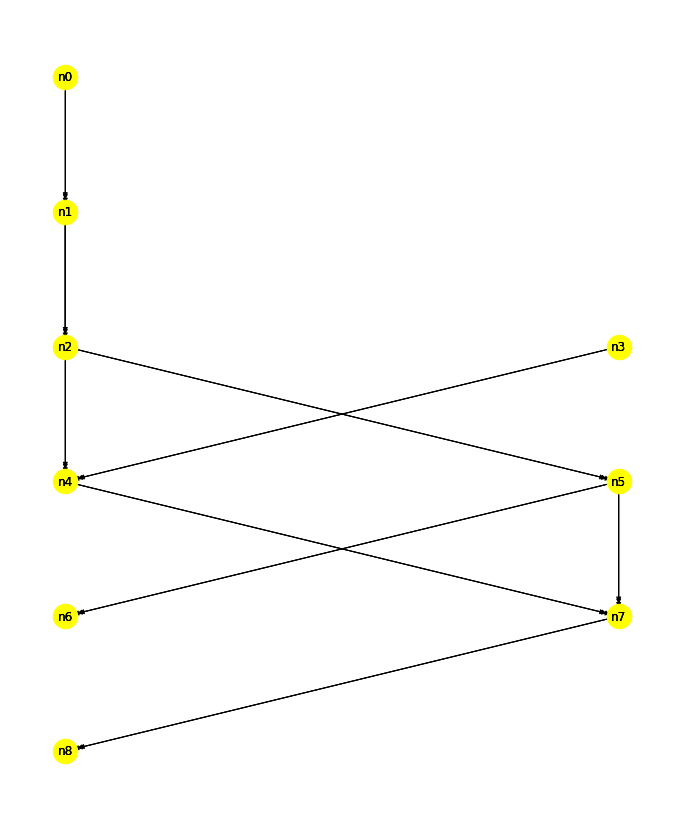

In [12]:
drawer = NaiveUnlimWideDrawer('dag9nodes.xml')
drawer.compute_layers()
drawer.draw(drawer.pos)

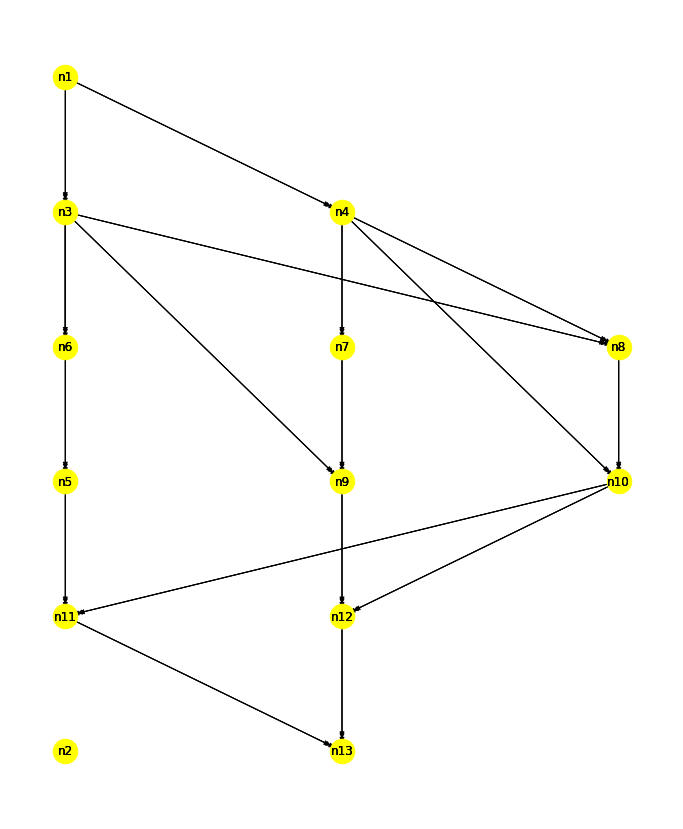

In [13]:
drawer = NaiveUnlimWideDrawer('dag13nodes.xml')
drawer.compute_layers()
drawer.draw(drawer.pos)

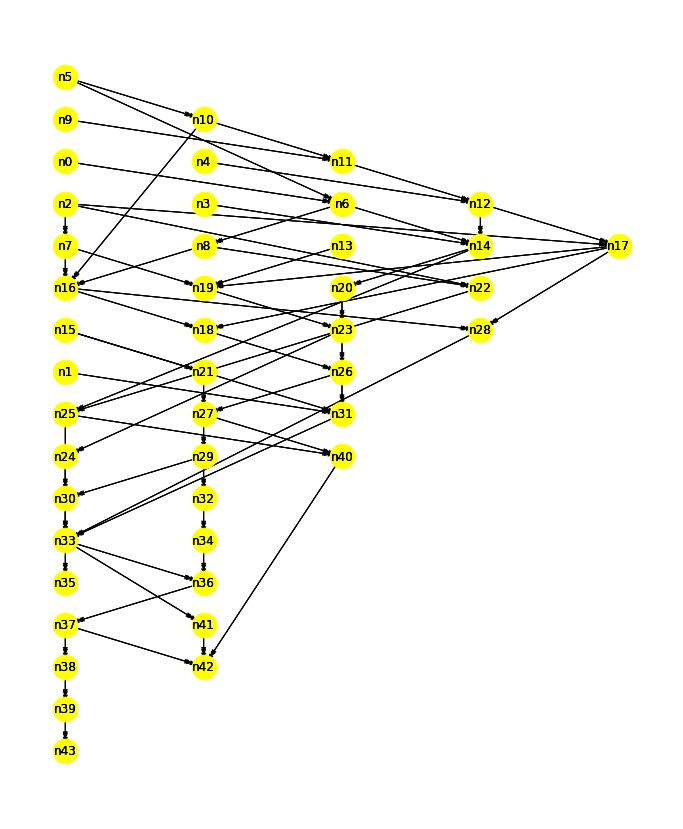

In [14]:
drawer = NaiveUnlimWideDrawer('dag44nodes.xml')
drawer.compute_layers()
drawer.draw(drawer.pos)

## Класс, добавляющий dummy-вершины

In [15]:
class DummyInjector:
    def __init__(self, drawer: AcyclicGraphDrawer):
        self.graph = drawer.graph
        self.layer_by_node = drawer.layer_by_node
        self.nodes = drawer.nodes
    
    def inject(self) -> NoReturn:
        curr_dummy: int = 0
        for curr_node in self.nodes:
            for follow_node in list(self.graph[curr_node]):
                dy: int = self.layer_by_node[curr_node]
                dy -= self.layer_by_node[follow_node]
                if dy <= 1:
                    continue
                    
                self.graph.remove_edge(curr_node, follow_node)
                from_node:     int = curr_node
                current_layer: int = self.layer_by_node[curr_node] - 1
                
                for i in range(dy - 1):
                    dummy:     str = 'd{}'.format(curr_dummy)
                    curr_dummy += 1
                    self.graph.add_node(dummy)
                    self.graph.add_edge(from_node, dummy)
                    self.layer_by_node[dummy] = current_layer
                    current_layer -= 1                
                    from_node:    int = dummy            
                self.graph.add_edge(from_node, follow_node) 

## Класс для отрисовки DAG'a методом Грэхема—Коффмана с dummy-вершинами

In [16]:
class GrahamCoffmanWithDummyDrawer(NaiveGrahamCoffmanDrawer):
    def __init__(self, path: str, layer_wide: Optional[int] = None):
        super().__init__(path, layer_wide)
        self.injector: DummyInjector = DummyInjector(self)
    
    def graham_coffman(self) -> NoReturn:
        super().graham_coffman()
        self.injector.inject()     
        self.nodes = list(self.graph.nodes)

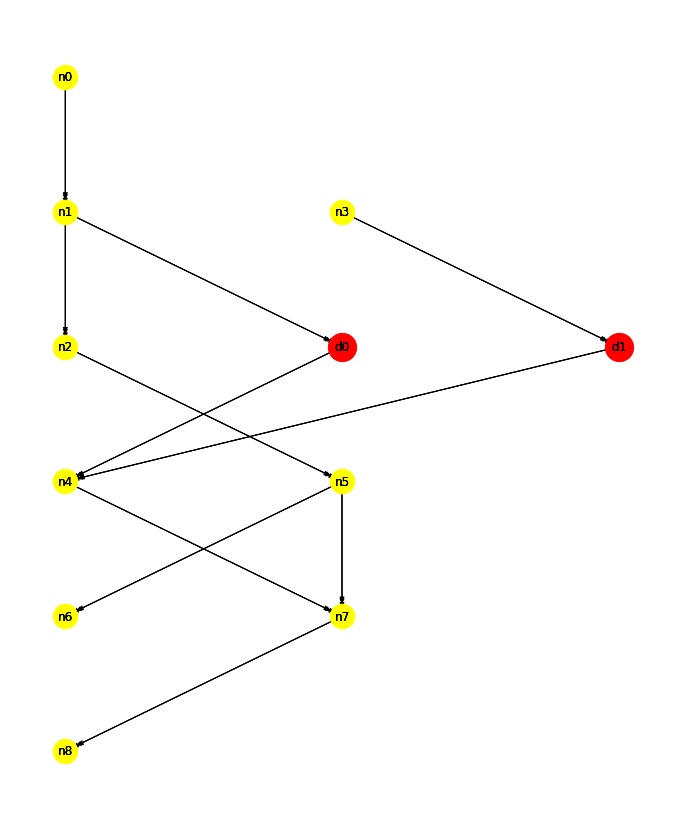

In [17]:
drawer = GrahamCoffmanWithDummyDrawer('dag9nodes.xml', 4)
drawer.graham_coffman()
drawer.draw(drawer.pos)

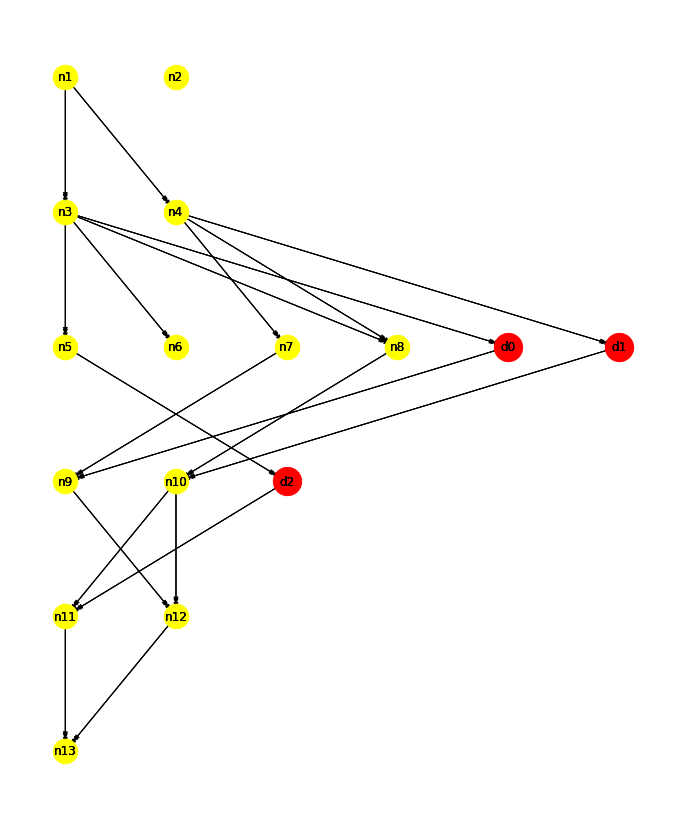

In [18]:
drawer = GrahamCoffmanWithDummyDrawer('dag13nodes.xml', 5)
drawer.graham_coffman()
drawer.draw(drawer.pos)

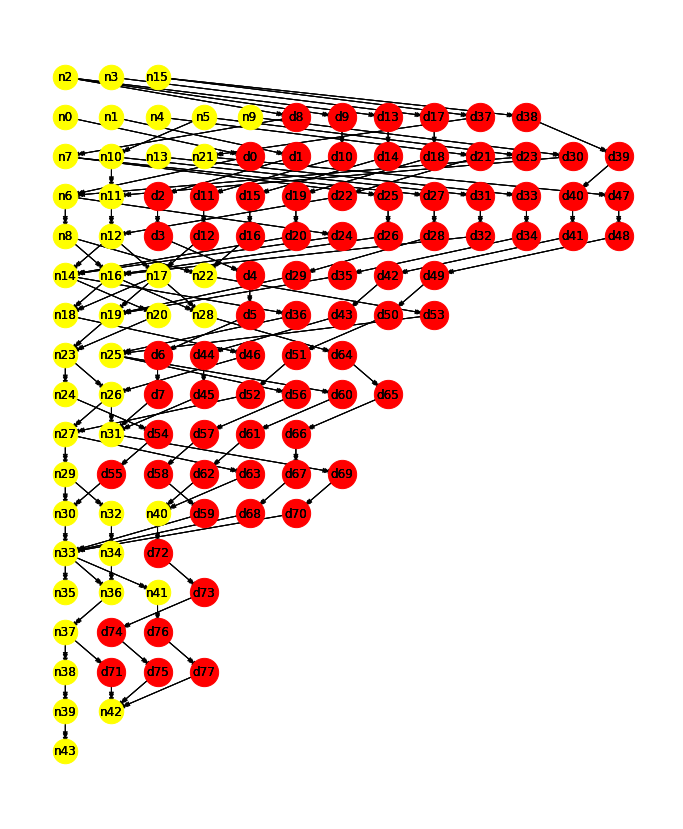

In [19]:
drawer = GrahamCoffmanWithDummyDrawer('dag44nodes.xml', 5)
drawer.graham_coffman()
drawer.draw(drawer.pos)

## Класс для отрисовки DAG'a методом линейного программирования с dummy-вершинами

In [20]:
class NaiveUnlimWideWithDummyDrawer(NaiveUnlimWideDrawer):
    def __init__(self, path: str, layer_wide: Optional[int] = None):
        super().__init__(path, layer_wide)
        self.injector: DummyInjector = DummyInjector(self)
        
    def compute_layers(self) -> NoReturn:
        super().compute_layers()
        self.injector.inject() 
        self.nodes: List[str] = list(self.graph.nodes)

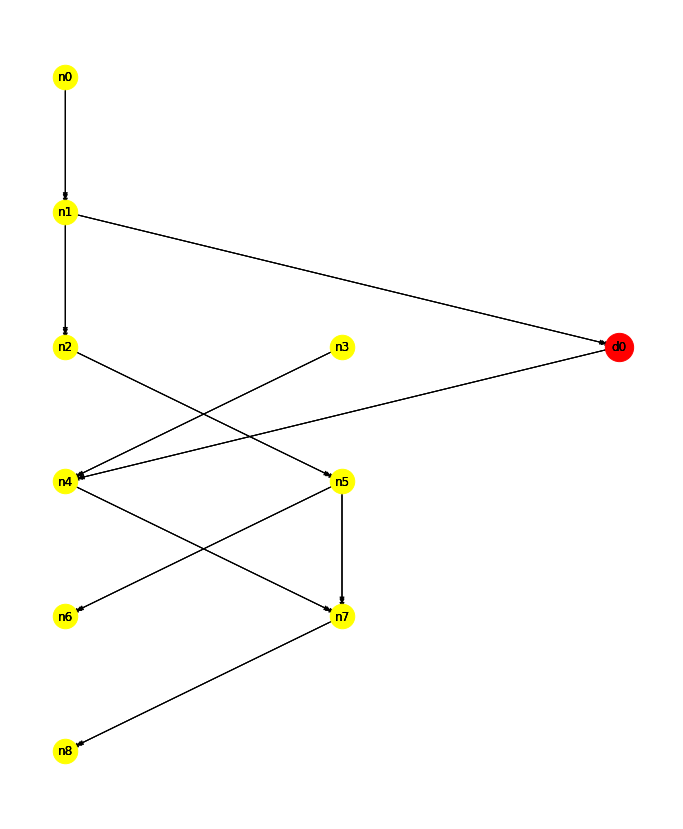

In [21]:
drawer = NaiveUnlimWideWithDummyDrawer('dag9nodes.xml')
drawer.compute_layers()
drawer.draw(drawer.pos)

Кол-во dummy-вершин при отрисовке данного графа методом Грэхема—Коффмана равно 3.

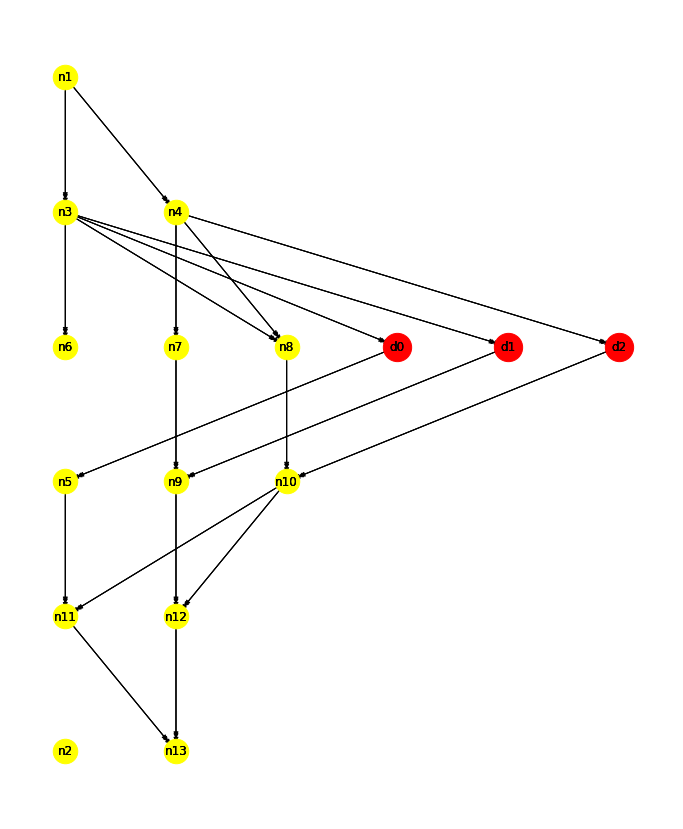

In [22]:
drawer = NaiveUnlimWideWithDummyDrawer('dag13nodes.xml')
drawer.compute_layers()
drawer.draw(drawer.pos)

Кол-во dummy-вершин при отрисовке данного графа методом Грэхема—Коффмана равно 3.

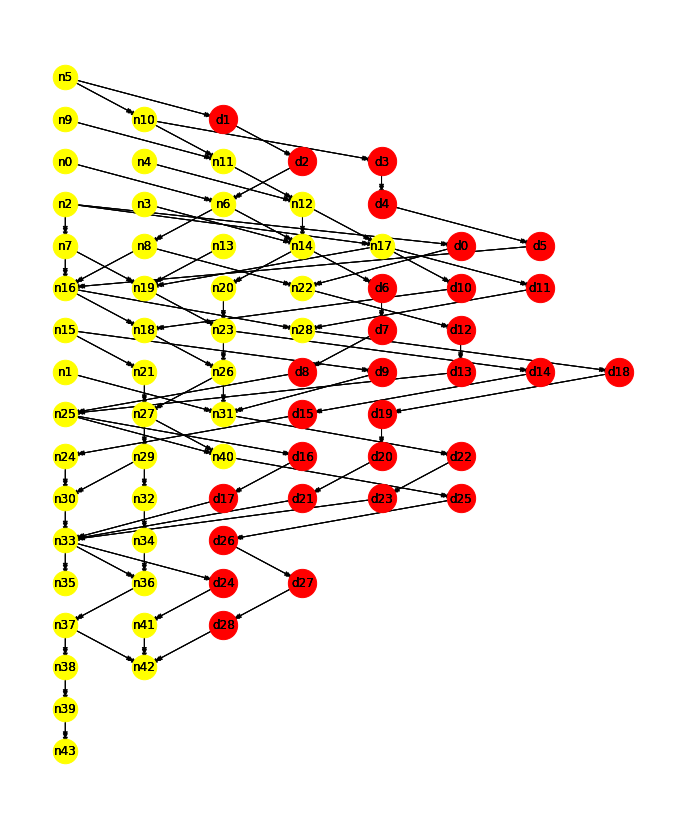

In [23]:
drawer = NaiveUnlimWideWithDummyDrawer('dag44nodes.xml')
drawer.compute_layers()
drawer.draw(drawer.pos)

Кол-во dummy-вершин при отрисовке данного графа методом Грэхема—Коффмана равно 67.

## Класс, минимизирующий кол-во пересечении

In [24]:
class CrossingMinimizer:
    def __init__(self, drawer: AcyclicGraphDrawer):
        self.graph = drawer.graph
        
    def sweep(self, 
              layer: List[str], 
              vertex: str, 
              pos: Dict[str, Tuple[int, int]], 
              method: Callable = np.average) -> NoReturn:
        predecessors: List[str] = list(filter(lambda v: v in layer, 
                                                 self.graph.predecessors(vertex)))
        if predecessors:
            x_coords = [pos[predecessor][0] for predecessor in predecessors]
            return int(method(np.array(x_coords)))
        else:
            return pos[vertex][0]
        
    def sweeps(self, 
               layers: List[str], 
               pos: Dict[str, Tuple[int, int]], 
               iters=16) -> Dict[str, Tuple[int, int]]:
        for iter_ in range(iters):
            key: Callable = lambda vertex: self.sweep(layer=layers[layer + 1], 
                                                      vertex=vertex, 
                                                      pos=pos, 
                                                      method=(np.average if iter_ % 2 == 0 else median))
            for layer in list(layers.keys()):
                for x_coord, vertex in enumerate(sorted(layers[layer], key=key)):
                    pos[vertex] = (x_coord, pos[vertex][1])
        return pos

## Класс для отрисовки DAG'a методом Грэхема—Коффмана с минимизацией пересечений рёбер

In [25]:
class GrahamCoffmanMinCrossingDrawer(GrahamCoffmanWithDummyDrawer):
    def __init__(self, path: str, layer_wide: Optional[int] = None):
        super().__init__(path, layer_wide)
        self.minimizer: CrossingMinimizer = CrossingMinimizer(self)
        
    @property
    def pos(self) -> Dict[str, Tuple[int, int]]:
        return self.minimizer.sweeps(self.layers, super().pos)

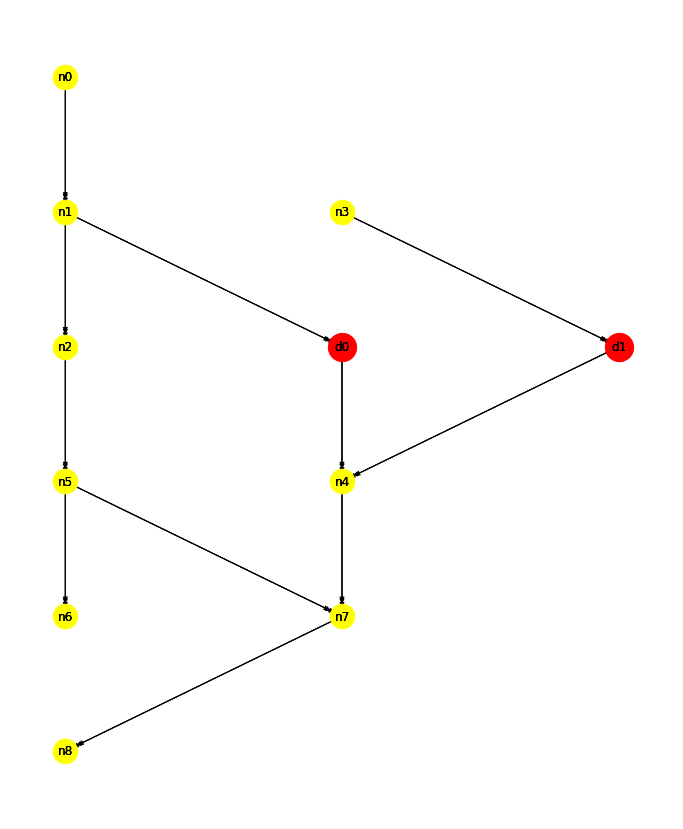

In [26]:
drawer = GrahamCoffmanMinCrossingDrawer('dag9nodes.xml', 4)
drawer.graham_coffman()
drawer.draw(drawer.pos)

Кол-во пересечений без их минимизации равно 2.

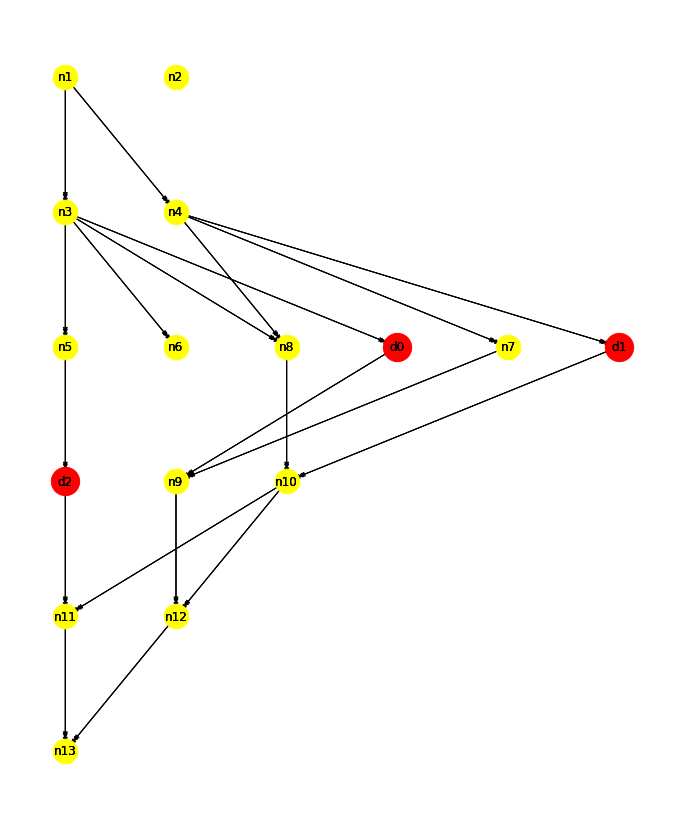

In [27]:
drawer = GrahamCoffmanMinCrossingDrawer('dag13nodes.xml', 5)
drawer.graham_coffman()
drawer.draw(drawer.pos)

Кол-во пересечений без их минимизации равно 8.

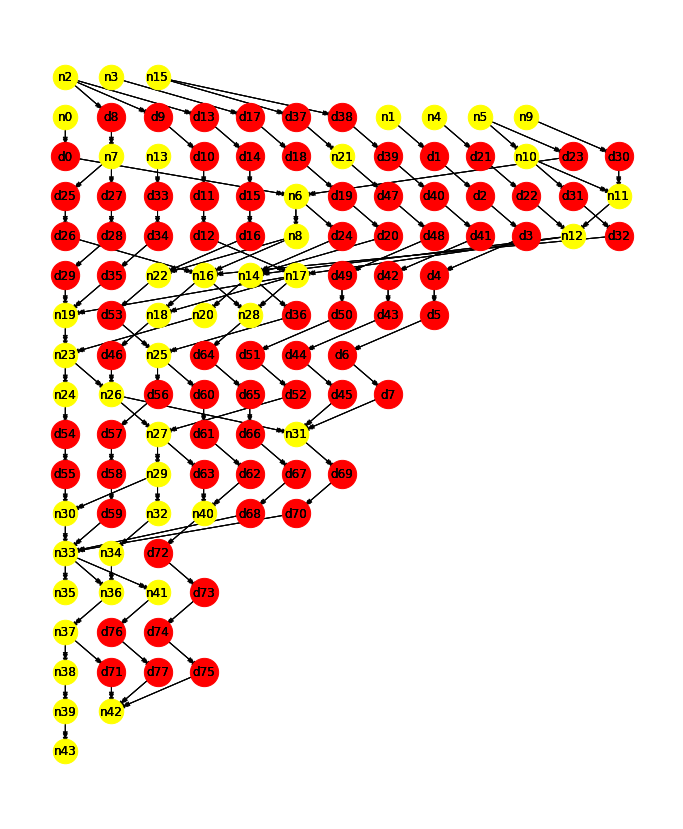

In [28]:
drawer = GrahamCoffmanMinCrossingDrawer('dag44nodes.xml', 5)
drawer.graham_coffman()
drawer.draw(drawer.pos)

## Класс для отрисовки DAG'a методом линейного программирования с минимизацией пересечений рёбер

In [29]:
class NaiveUnlimWideMinCrossingDrawer(NaiveUnlimWideWithDummyDrawer):
    def __init__(self, path: str, layer_wide: Optional[int] = None):
        super().__init__(path, layer_wide)
        self.minimizer: CrossingMinimizer = CrossingMinimizer(self)
        
    @property
    def pos(self) -> Dict[str, Tuple[int, int]]:
        return self.minimizer.sweeps(self.layers, super().pos)

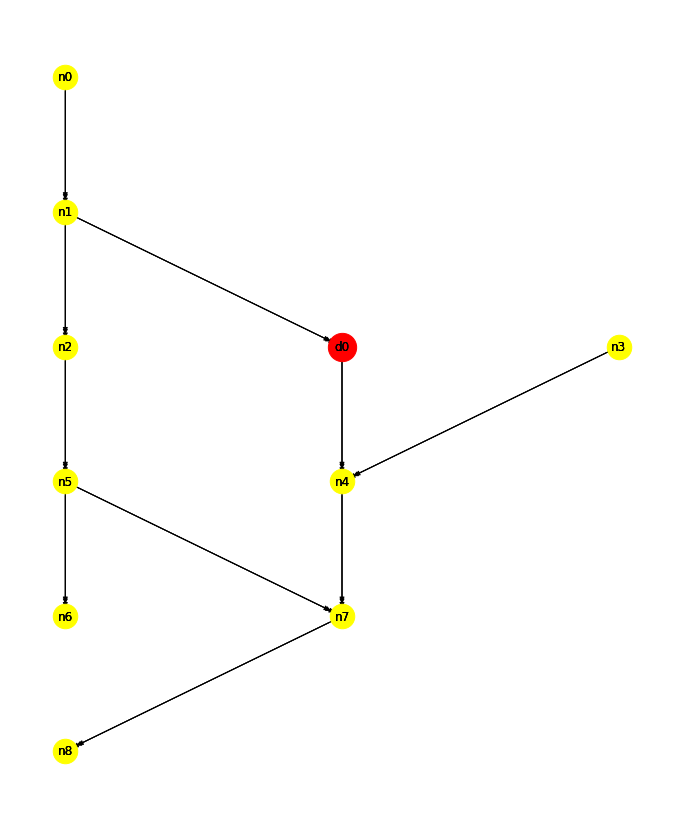

In [30]:
drawer = NaiveUnlimWideMinCrossingDrawer('dag9nodes.xml')
drawer.compute_layers()
drawer.draw(drawer.pos)

Кол-во пересечений без их минимизации равно 3.

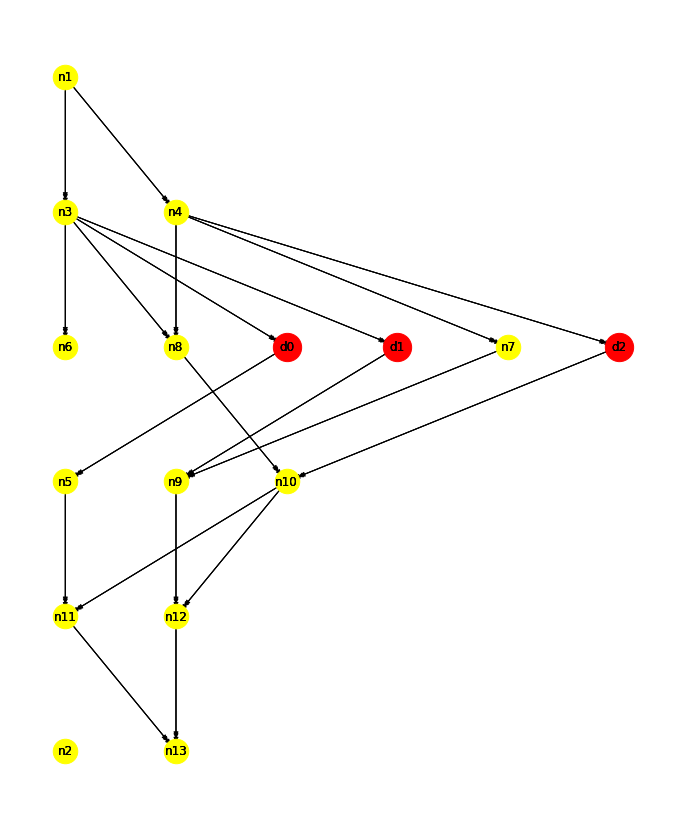

In [31]:
drawer = NaiveUnlimWideMinCrossingDrawer('dag13nodes.xml')
drawer.compute_layers()
drawer.draw(drawer.pos)

Кол-во пересечений без их минимизации равно 9.

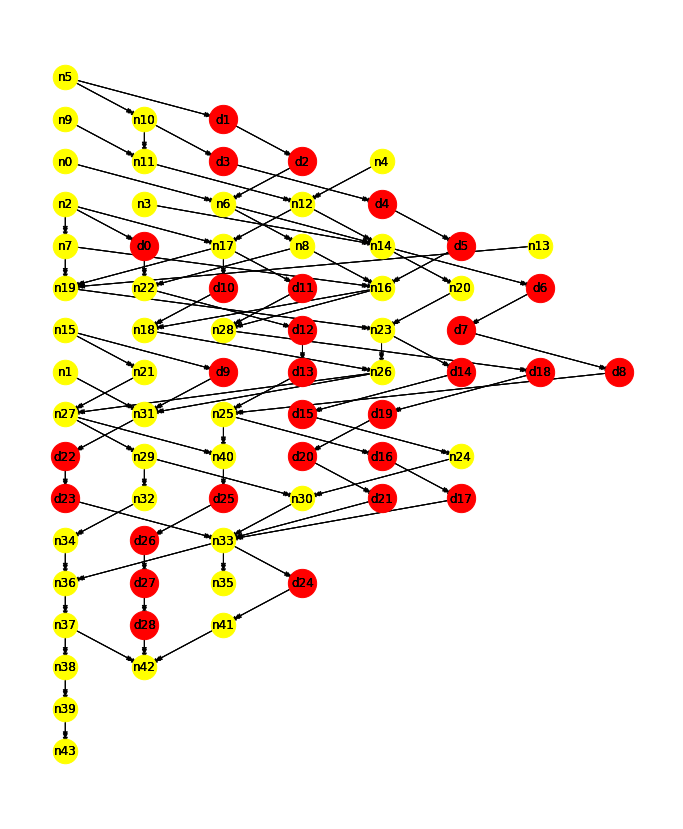

In [32]:
drawer = NaiveUnlimWideMinCrossingDrawer('dag44nodes.xml')
drawer.compute_layers()
drawer.draw(drawer.pos)